# Online Sales Analysis

In [1]:
### Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

###  Importing data

In [3]:
df = pd.read_csv('OnlineSalesData.csv')
df

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
...,...,...,...,...,...,...,...,...,...
235,10236,2024-08-23,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal
236,10237,2024-08-24,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card
237,10238,2024-08-25,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card
238,10239,2024-08-26,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal


### Exploratory Data Analysis

In [4]:
columns = df.columns
columns

Index(['Transaction ID', 'Date', 'Product Category', 'Product Name',
       'Units Sold', 'Unit Price', 'Total Revenue', 'Region',
       'Payment Method'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [6]:
df.describe()

,Transaction ID,Units Sold,Unit Price,Total Revenue
count,240.00000,240.000000,240.000000,240.000000
mean,10120.50000,2.158333,236.395583,335.699375
std,69.42622,1.322454,429.446695,485.804469
min,10001.00000,1.000000,6.500000,6.500000
25%,10060.75000,1.000000,29.500000,62.965000
50%,10120.50000,2.000000,89.990000,179.970000
75%,10180.25000,3.000000,249.990000,399.225000
max,10240.00000,10.000000,3899.990000,3899.990000


In [7]:
# CHECKING NULL VALUES
df.isnull().sum()

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64

In [8]:
df.groupby ('Product Category').sum('Units Sold')

,Transaction ID,Units Sold,Unit Price,Total Revenue
Product Category,,,,
Beauty Products,404880,46,2464.92,2621.90
Books,404840,114,646.12,1861.93
Clothing,404800,145,2701.46,8128.93
Electronics,404720,66,27663.66,34982.41
Home Appliances,404760,59,12807.42,18646.16
Sports,404920,88,10451.36,14326.52


In [9]:
df.groupby ('Product Category')['Units Sold'].sum()

Product Category
Beauty Products     46
Books              114
Clothing           145
Electronics         66
Home Appliances     59
Sports              88
Name: Units Sold, dtype: int64

In [10]:
#Checking duplicates
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
235    False
236    False
237    False
238    False
239    False
Length: 240, dtype: bool

In [11]:
#Converting date into datetime format
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0     2024-01-01
1     2024-01-02
2     2024-01-03
3     2024-01-04
4     2024-01-05
         ...    
235   2024-08-23
236   2024-08-24
237   2024-08-25
238   2024-08-26
239   2024-08-27
Name: Date, Length: 240, dtype: datetime64[ns]

In [12]:
df['Month'] = df['Date'].dt.to_period('M')
df['Month']

0      2024-01
1      2024-01
2      2024-01
3      2024-01
4      2024-01
        ...   
235    2024-08
236    2024-08
237    2024-08
238    2024-08
239    2024-08
Name: Month, Length: 240, dtype: period[M]

In [13]:
df.columns

Index(['Transaction ID', 'Date', 'Product Category', 'Product Name',
       'Units Sold', 'Unit Price', 'Total Revenue', 'Region', 'Payment Method',
       'Month'],
      dtype='object')

In [14]:
df['Units Sold'] = df['Units Sold'].astype(int)
df['Unit Price'] = df['Unit Price'].astype(float)
df['Total Revenue'] = df['Total Revenue'].astype(float)

#### Data Analysis Using Matplotlib and SNS

##### Revenue Analysis

In [15]:
sales_trends = df.groupby('Date')['Total Revenue'].sum().reset_index()
sales_trends

,Date,Total Revenue
0,2024-01-01,1999.98
1,2024-01-02,499.99
2,2024-01-03,209.97
3,2024-01-04,63.96
4,2024-01-05,89.99
...,...,...
235,2024-08-23,159.99
236,2024-08-24,270.00
237,2024-08-25,32.97
238,2024-08-26,55.00


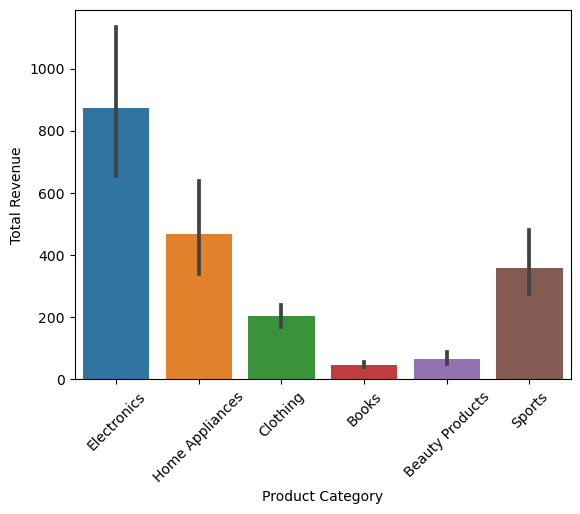

In [16]:
sns.barplot(data = df, y = 'Total Revenue', x = 'Product Category')
plt.xticks(rotation = 45)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

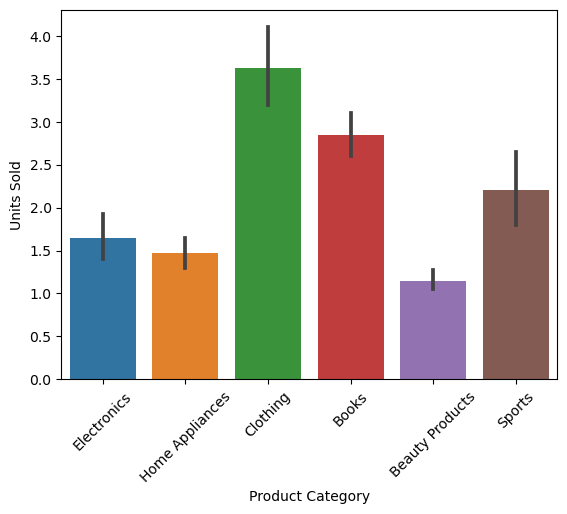

In [17]:
sns.barplot(data = df, x = 'Product Category',  y = 'Units Sold')
plt.xticks(rotation = 45)
plt.show

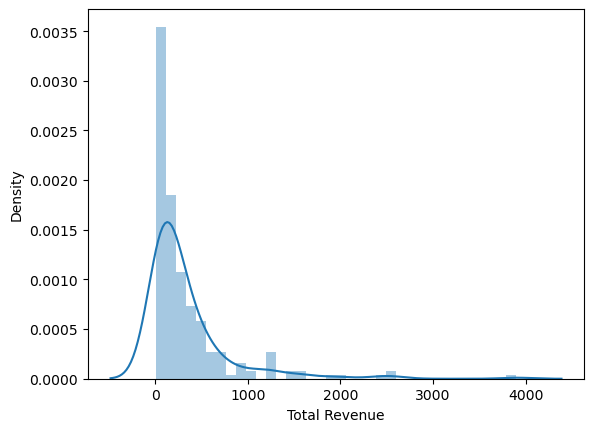

In [18]:
sns.distplot(df['Total Revenue'])
plt.show()

##### Sales trend and analysis

In [19]:
plt.figure(figsize = (12,6))
SalesTrends = df.groupby('Date').sum(['Total Revenue']).reset_index()
SalesTrends

,Date,Transaction ID,Units Sold,Unit Price,Total Revenue
0,2024-01-01,10001,2,999.99,1999.98
1,2024-01-02,10002,1,499.99,499.99
2,2024-01-03,10003,3,69.99,209.97
3,2024-01-04,10004,4,15.99,63.96
4,2024-01-05,10005,1,89.99,89.99
...,...,...,...,...,...
235,2024-08-23,10236,1,159.99,159.99
236,2024-08-24,10237,3,90.00,270.00
237,2024-08-25,10238,3,10.99,32.97
238,2024-08-26,10239,1,55.00,55.00


<Figure size 1200x600 with 0 Axes>

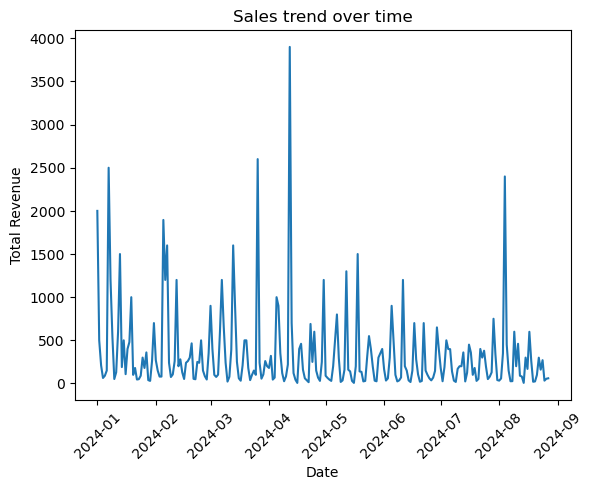

In [20]:
plt.plot(SalesTrends['Date'], SalesTrends['Total Revenue'])
plt.title('Sales trend over time')
plt.ylabel('Total Revenue')
plt.xlabel('Date')
plt.xticks(rotation = 45)
plt.show()

In [21]:
#to check column names
df.columns

Index(['Transaction ID', 'Date', 'Product Category', 'Product Name',
       'Units Sold', 'Unit Price', 'Total Revenue', 'Region', 'Payment Method',
       'Month'],
      dtype='object')

In [22]:
CategoryRegionSales = df.groupby(['Region', 'Product Category'])['Total Revenue'].sum().unstack()
CategoryRegionSales

Product Category,Beauty Products,Books,Clothing,Electronics,Home Appliances,Sports
Region,,,,,,
Asia,NaN,NaN,8128.93,NaN,NaN,14326.52
Europe,2621.9,NaN,NaN,NaN,18646.16,NaN
North America,NaN,1861.93,NaN,34982.41,NaN,NaN


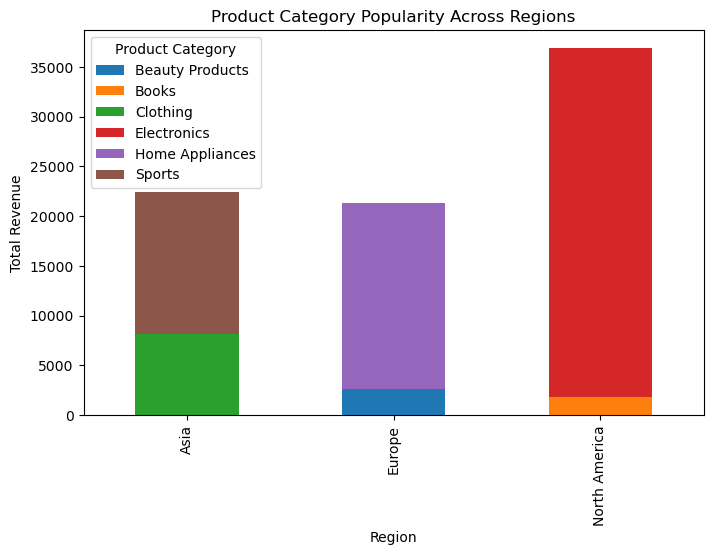

In [23]:
CategoryRegionSales.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Product Category Popularity Across Regions')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.legend(title='Product Category')
plt.show()

sns.boxplot(x='Region', y='Units Sold', hue='Product Category', data=df)
plt.title('Distribution of Product Category Sales Volume Region_wise')
plt.xlabel('Region')
plt.ylabel('Units Sold')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##### Payment method analysis

In [24]:
PaymentMethodSales = df.groupby('Payment Method')['Total Revenue'].sum().reset_index()
PaymentMethodSales

,Payment Method,Total Revenue
0,Credit Card,51170.86
1,Debit Card,8128.93
2,PayPal,21268.06


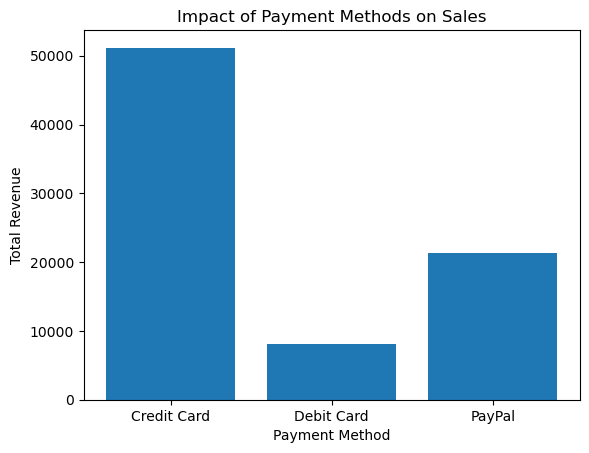

In [25]:
plt.bar(PaymentMethodSales['Payment Method'], PaymentMethodSales['Total Revenue'])
plt.title('Impact of Payment Methods on Sales')
plt.xlabel('Payment Method')
plt.ylabel('Total Revenue')
plt.show()

In [26]:
PaymentRegionSales = df.groupby(['Region', 'Payment Method'])['Total Revenue'].sum().unstack()
PaymentRegionSales

Payment Method,Credit Card,Debit Card,PayPal
Region,,,
Asia,14326.52,8128.93,NaN
Europe,NaN,NaN,21268.06
North America,36844.34,NaN,NaN


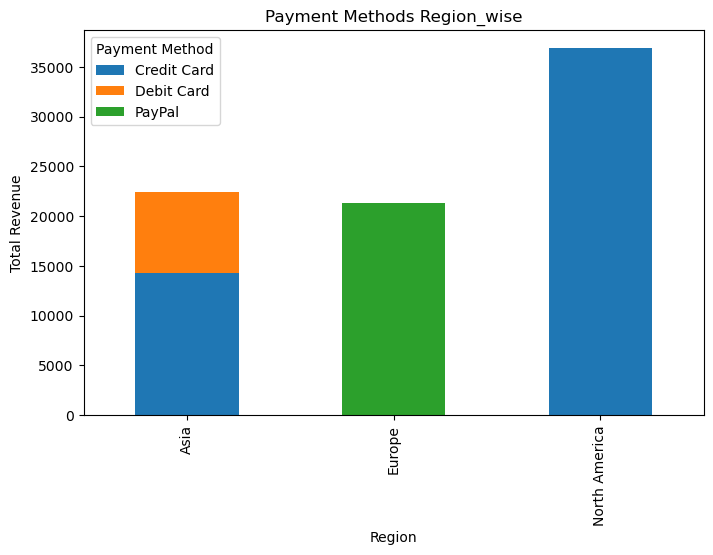

In [27]:
PaymentRegionSales.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Payment Methods Region_wise')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.legend(title='Payment Method')
plt.show()

##### Top Product Analysis

In [28]:
TopProducts = df.groupby(['Product Category', 'Product Name'])['Total Revenue'].sum().reset_index().sort_values(by='Total Revenue', ascending=False).head(10)
TopProducts

,Product Category,Product Name,Total Revenue
130,Electronics,Canon EOS R5 Camera,3899.99
182,Home Appliances,LG OLED TV,2599.98
142,Electronics,MacBook Pro 16-inch,2499.99
123,Electronics,Apple MacBook Pro 16-inch,2399.00
154,Electronics,iPhone 14 Pro,1999.98
217,Sports,Peloton Bike,1895.00
138,Electronics,HP Spectre x360 Laptop,1599.99
190,Home Appliances,Roomba i7+,1599.98
149,Electronics,Samsung Odyssey G9 Gaming Monitor,1499.99
146,Electronics,Samsung Galaxy Tab S8,1499.98


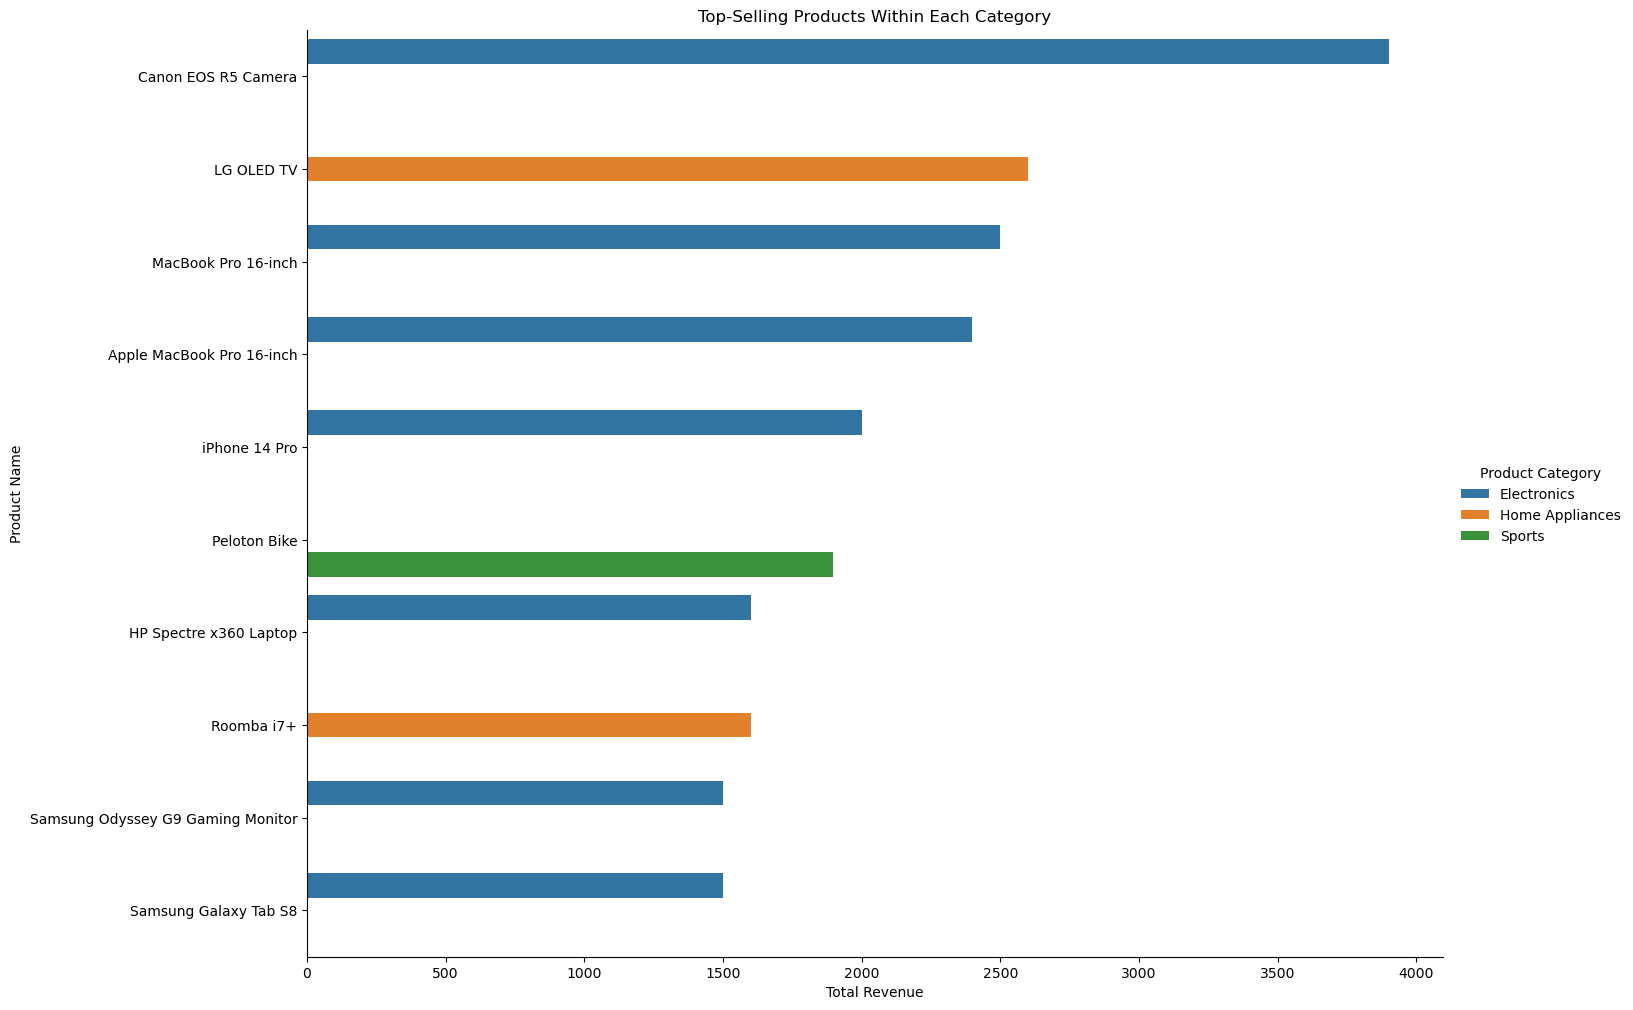

In [29]:
sns.catplot(x='Total Revenue', y='Product Name', hue='Product Category', data=TopProducts, kind='bar', height=10, aspect=1.5)
plt.title('Top-Selling Products Within Each Category')
plt.show()

In [30]:
TopProductsUnits = df.groupby(['Product Category', 'Product Name'])['Units Sold'].sum().reset_index().sort_values(by='Units Sold', ascending=False).groupby('Product Category').head(10)
TopProductsUnits

,Product Category,Product Name,Units Sold
91,Clothing,Hanes ComfortSoft T-Shirt,10
52,Books,The Catcher in the Rye by J.D. Salinger,7
98,Clothing,Nike Air Force 1,6
88,Clothing,Gap Essential Crewneck T-Shirt,6
220,Sports,Spalding NBA Street Basketball,6
231,Sports,Yeti Rambler Tumbler,6
85,Clothing,Forever 21 Graphic Tee,5
76,Clothing,Adidas 3-Stripes Shorts,5
109,Clothing,Tommy Hilfiger Polo Shirt,5
56,Books,The Girl with the Dragon Tattoo by Stieg Larsson,5


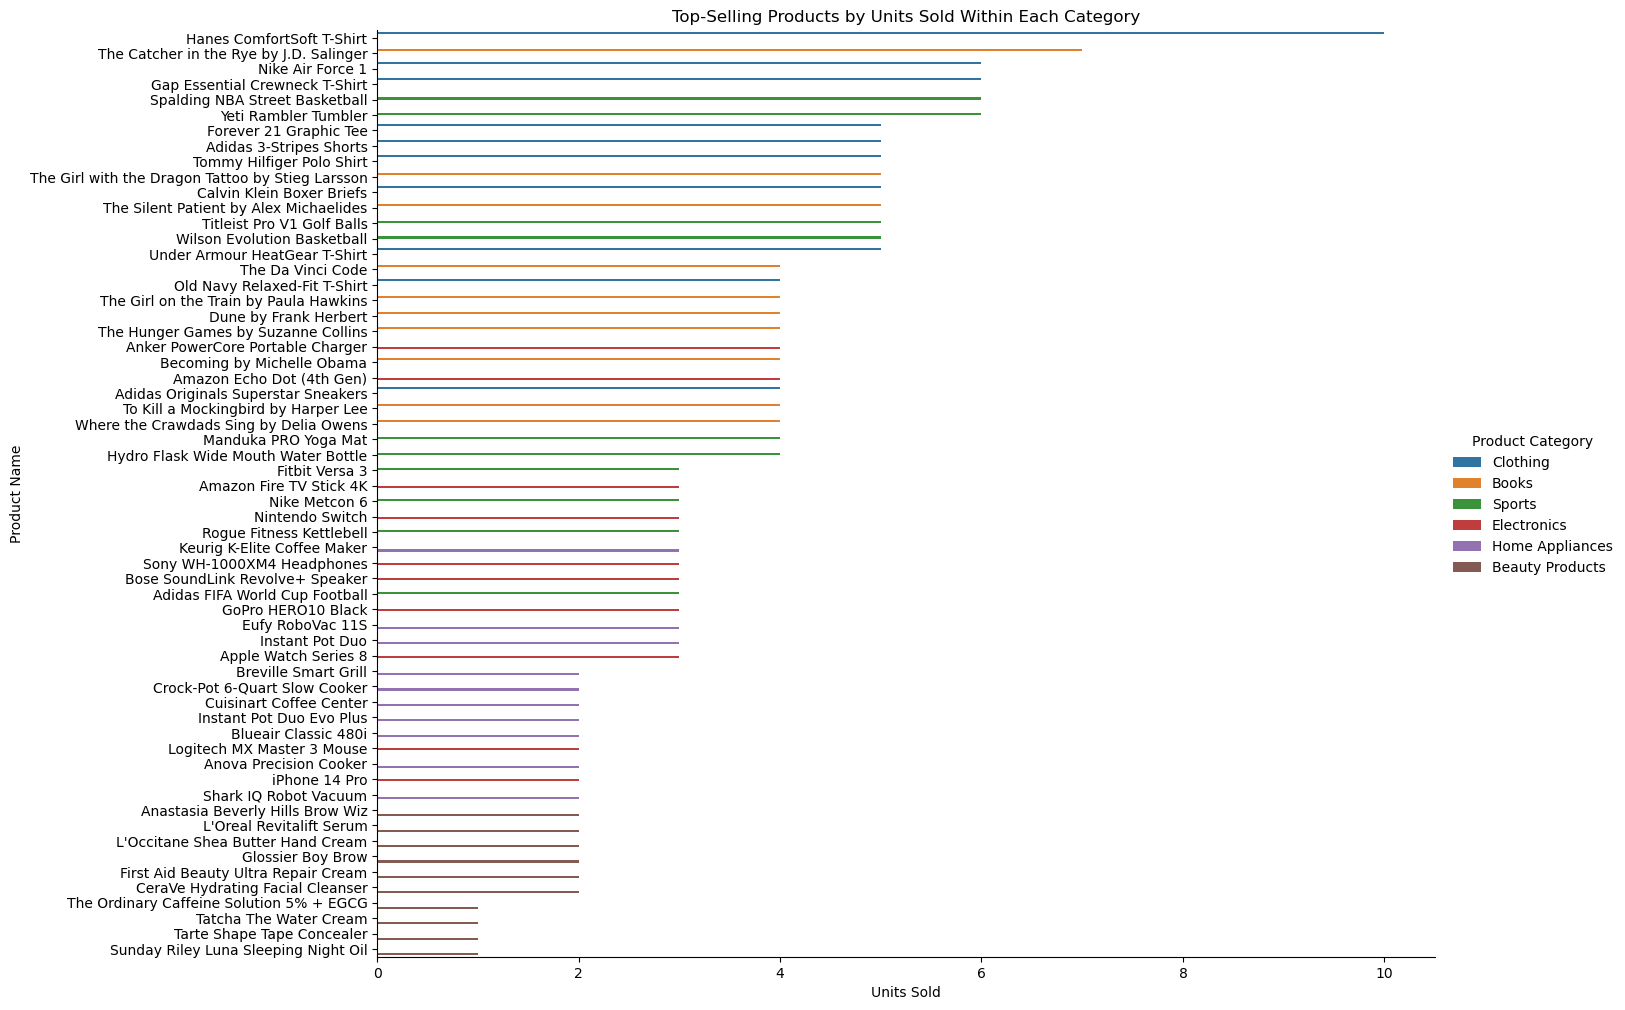

In [31]:
sns.catplot(x='Units Sold', y='Product Name', hue='Product Category', data=TopProductsUnits, kind='bar', height=10, aspect=1.5)
plt.title('Top-Selling Products by Units Sold Within Each Category')
plt.xlabel('Units Sold')
plt.ylabel('Product Name')
plt.show()

In [32]:
CategoryRegionPerformance = df.groupby(['Region', 'Product Category'])['Total Revenue'].sum().reset_index()
CategoryRegionPerformance

,Region,Product Category,Total Revenue
0,Asia,Clothing,8128.93
1,Asia,Sports,14326.52
2,Europe,Beauty Products,2621.90
3,Europe,Home Appliances,18646.16
4,North America,Books,1861.93
5,North America,Electronics,34982.41


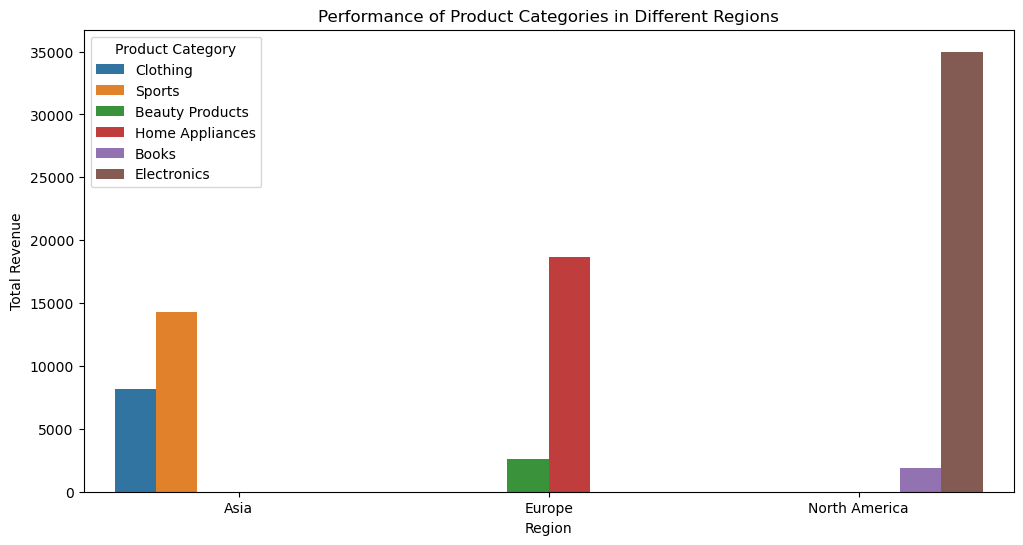

In [33]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Total Revenue', hue='Product Category', data=CategoryRegionPerformance)
plt.title('Performance of Product Categories in Different Regions')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.legend(title='Product Category')
plt.show()